In [ ]:
#Comprehensive national nutrition survey (CNNS)
#Analysis based on Key Anthropometric Indicators by sex

#Second Draft

In [1]:


library(tidyverse) # metapackage of all tidyverse packages



list.files(path = "../input")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "national-nutritional-survey"

In [2]:
dat <- read.csv('/kaggle/input/national-nutritional-survey/Comprehensive National Nutrition Survey (CNNS) 2016-18  Key Anthropometric Indicators by Sex.csv')


# Random Forest Model for Nutritional Children under 5 Years Over 2016 in India

In [3]:
# step 1 : collect the data
dat <- read.csv('/kaggle/input/national-nutritional-survey/Comprehensive National Nutrition Survey (CNNS) 2016-18  Key Anthropometric Indicators by Sex.csv')

# step 2 : inspect data
str(dat)

# step 3 : select some feature and collect, 
# save it into new data called 'data'
data <- data.frame(dat[,8:14])

# step 4 : inspect the data
str(data)

# Step 5 : some variables are too long 'names' so we need to change them to X. 
# It might be easy for us to put in to the model
Gender <- data$Gender
X1 <- data$Stunted..height.for.age..children.under.the.age.of.5.years....            
X2 <- data$Severely.stunted..height.for.age..children.under.the.age.of.5.years....   
X3 <- data$Wasted..weight.for.height..children.under.the.age.of.5.years....          
X4 <- data$Severely.wasted..weight.for.height..children.under.the.age.of.5.years.... 
X5 <- data$Underweight.children.under.the.age.of.5.years....                        
X6 <- data$Severely.underweight.children.under.the.age.of.5.years....

# step 6 : make a new dataset 
newdata <- data.frame(Gender, X1, X2, X3, X4, X5, X6)

# Step 7 : we want the gender as a factor not a character, so we need to 
# change it into a factor
newdata$Gender <- as.factor(newdata$Gender)

# inspect the new dataset
str(newdata)

'data.frame':	62 obs. of  44 variables:
 $ Rowid                                                                                                                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country                                                                                                                             : chr  "India" "India" "India" "India" ...
 $ State.lgd.code                                                                                                                      : int  1 1 2 2 3 3 5 5 6 6 ...
 $ State                                                                                                                               : chr  "Jammu And Kashmir" "Jammu And Kashmir" "Himachal Pradesh" "Himachal Pradesh" ...
 $ Yearcode                                                                                                                            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Year                      

In [4]:
# step 8 : make a random forest model
## use the Gender as a target label, and the others as a features
library(randomForest)
model <- randomForest(Gender ~ .,
	data = newdata, proximity = TRUE, ntree=10000)
model

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = Gender ~ ., data = newdata, proximity = TRUE,      ntree = 10000) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 45.16%
Confusion matrix:
       Female Male class.error
Female     16   15   0.4838710
Male       13   18   0.4193548

OOB said that the average error was 46.77%, meaning that the random forest model was only able to predict children nutrition by 53.23% based on the male and female.


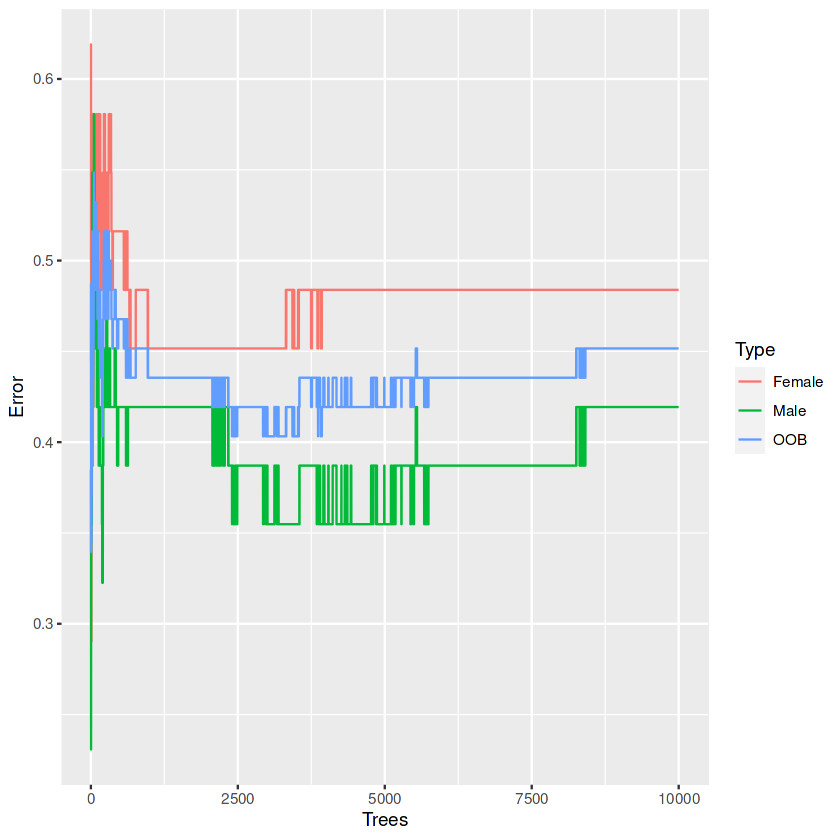

In [5]:
# step 10 : plot the error rates to see if 1000 trees is enough for optimal classification
oob.error.newdata <- data.frame(
	Trees=rep(1:nrow(model$err.rate), times=3),
	Type=rep(c("OOB", "Female", "Male"), 
	each=nrow(model$err.rate)),
	Error=c(model$err.rate[,"OOB"],
		model$err.rate[,"Female"],
		model$err.rate[,"Male"]))
library(ggplot2)
ggplot(data=oob.error.newdata, aes(x=Trees, y=Error)) +
	geom_line(aes(color=Type))

This plot showed that the optimum number of trees for this model was 10000. Indicating that the error was stabilize in these number of trees.

Warning message in RColorBrewer::brewer.pal(nlevs, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


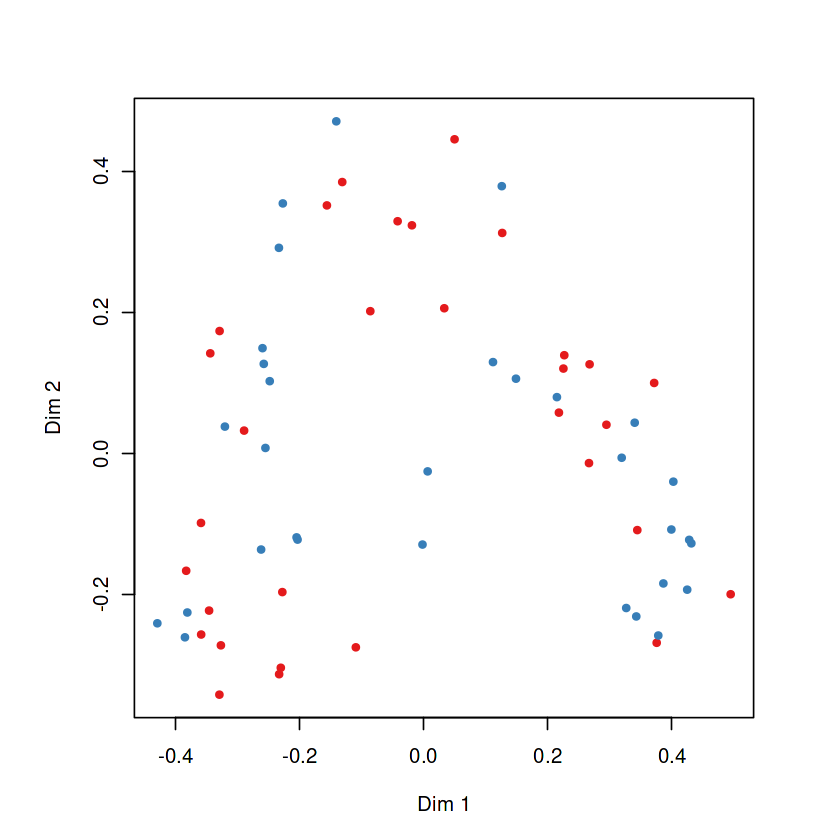

In [6]:
MDSplot(model, newdata$Gender)